In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
data = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv")

In [5]:
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,11/01/2019 12:00:00 AM,12.0,7.0,5.0
1,11/01/2019 01:00:00 AM,7.0,0.0,7.0
2,11/01/2019 02:00:00 AM,1.0,0.0,1.0
3,11/01/2019 03:00:00 AM,6.0,6.0,0.0
4,11/01/2019 04:00:00 AM,6.0,5.0,1.0


In [6]:
data = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", index_col = 'Date', parse_dates=True)

In [7]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [10]:
data.columns = ["Total","West","East"]

In [11]:
data.head()

,Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [14]:
data.describe()

,Total,West,East
count,138521.000000,138521.000000,138521.000000
mean,112.147025,51.104800,61.042225
std,142.887838,65.881672,88.902702
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [12]:
data.dropna()

,Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
...,...,...,...
2020-12-31 19:00:00,27.0,11.0,16.0
2020-12-31 20:00:00,18.0,9.0,9.0
2020-12-31 21:00:00,18.0,9.0,9.0


In [13]:
data.describe()

,Total,West,East
count,138521.000000,138521.000000,138521.000000
mean,112.147025,51.104800,61.042225
std,142.887838,65.881672,88.902702
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [15]:
#visualising the data

In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn

In [18]:
seaborn.set()

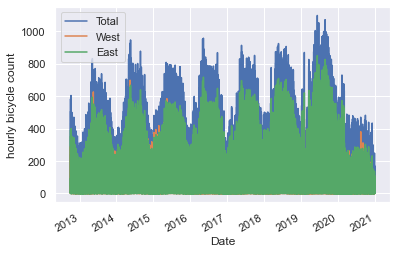

In [19]:
data.plot()
plt.ylabel("hourly bicycle count")
plt.show()

In [20]:
weekly = data.resample("W").sum()

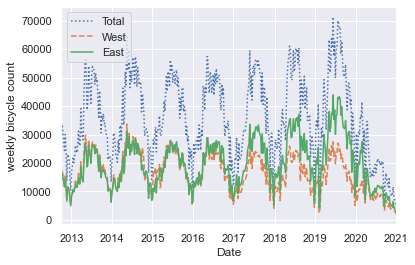

In [21]:
weekly.plot(style=[':',"--","-"])
plt.ylabel("weekly bicycle count")
plt.show()

In [24]:
daily = data.resample("D").sum()

Text(0, 0.5, 'mean hourly count')

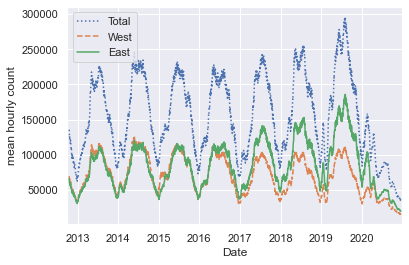

In [25]:
daily.rolling(30,center=True).sum().plot(style=[':','--','-'])
plt.ylabel("mean hourly count")

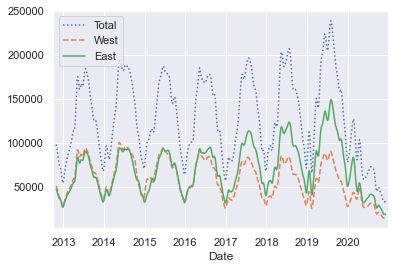

In [27]:
daily.rolling(50,center= True,win_type="gaussian").sum(std=10).plot(style=[':','--','-'])


Text(0, 0.5, 'Traffic according to time')

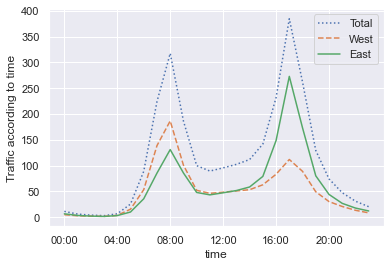

In [28]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':','--','-'])
plt.ylabel("Traffic according to time")